In [1]:
import tensorflow as tf
import numpy as np

from sklearn.model_selection import train_test_split

import matplotlib.ticker as ticker
import matplotlib.pyplot as plt

import time
import re
import os
import io

In [2]:
kor_train_path = os.path.join('./korean-english-park.train.ko')
eng_train_path = os.path.join('./korean-english-park.train.en')
kor_test_path = os.path.join('./korean-english-park.test.ko')
eng_test_path = os.path.join('./korean-english-park.test.en')

# 1. kor-train
with open(kor_train_path, "r") as f:
    kor_train_raw = f.read().splitlines()

# 2. eng-train
with open(eng_train_path, "r") as f:
    eng_train_raw = f.read().splitlines()

# 3. kor-test
with open(kor_test_path, "r") as f:
    kor_test_raw = f.read().splitlines()

# 4. eng-test
with open(eng_test_path, "r") as f:
    eng_test_raw = f.read().splitlines()
    
print("Kor Train Data Size:", len(kor_train_raw))
print("Eng Train Data Size:", len(eng_train_raw))
print("Kor Test Data Size:", len(kor_test_raw))
print("Eng Test Data Size:", len(eng_test_raw))

Kor Train Data Size: 94123
Eng Train Data Size: 94123
Kor Test Data Size: 2000
Eng Test Data Size: 2000


In [3]:
print("Kor Train Example:")
for sen in kor_train_raw[0:100][::20]: print(">>", sen)

print("Eng Train Example:")
for sen in eng_train_raw[0:100][::20]: print(">>", sen)

print("Kor Test Example:")
for sen in kor_test_raw[0:100][::20]: print(">>", sen)

print("Eng Test Example:")
for sen in eng_test_raw[0:100][::20]: print(">>", sen)

Kor Train Example:
>> 개인용 컴퓨터 사용의 상당 부분은 "이것보다 뛰어날 수 있느냐?"
>> 북한의 핵무기 계획을 포기하도록 하려는 압력이 거세지고 있는 가운데, 일본과 북한의 외교관들이 외교 관계를 정상화하려는 회담을 재개했다.
>> "경호 로보트가 침입자나 화재를 탐지하기 위해서 개인적으로, 그리고 전문적으로 사용되고 있습니다."
>> 수자원부 당국은 논란이 되고 있고, 막대한 비용이 드는 이 사업에 대해 내년에 건설을 시작할 계획이다.
>> 또한 근력 운동은 활발하게 걷는 것이나 최소한 20분 동안 뛰는 것과 같은 유산소 활동에서 얻는 운동 효과를 심장과 폐에 주지 않기 때문에, 연구학자들은 근력 운동이 심장에 큰 영향을 미치는지 여부에 대해 논쟁을 해왔다.
Eng Train Example:
>> Much of personal computing is about "can you top this?"
>> Amid mounting pressure on North Korea to abandon its nuclear weapons program Japanese and North Korean diplomats have resumed talks on normalizing diplomatic relations.
>> “Guard robots are used privately and professionally to detect intruders or fire,” Karlsson said.
>> Authorities from the Water Resources Ministry plan to begin construction next year on the controversial and hugely expensive project.
>> Researchers also have debated whether weight-training has a big impact on the heart, since it does not give the heart and lu

In [4]:
def check_sentence_length(raw, str): 
    min_len = 999
    max_len = 0
    sum_len = 0

    for sen in raw:
        length = len(sen)
        if min_len > length: min_len = length
        if max_len < length: max_len = length
        sum_len += length

    print("문장의 최단 길이:", min_len)
    print("문장의 최장 길이:", max_len)
    print("문장의 평균 길이:", sum_len // len(raw))

    sentence_length = np.zeros((max_len), dtype=int)

    for sen in raw:
        sentence_length[len(sen)-1] += 1

    plt.bar(range(max_len), sentence_length, width=1.0)
    plt.title(f'{str} Sentence Length Distribution')
    plt.show()
    
    return sentence_length

문장의 최단 길이: 1
문장의 최장 길이: 377
문장의 평균 길이: 60


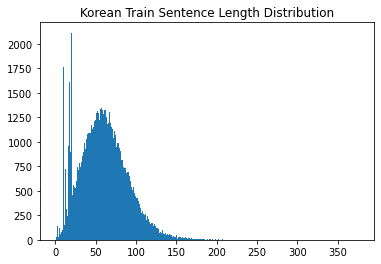

In [5]:
kotrain_sen_length = check_sentence_length( kor_train_raw, "Korean Train")

문장의 최단 길이: 1
문장의 최장 길이: 605
문장의 평균 길이: 126


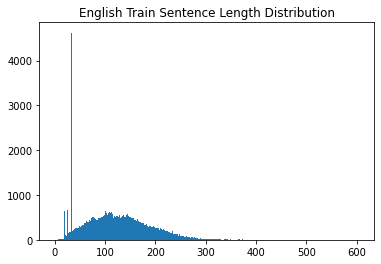

In [6]:
entrain_sen_length = check_sentence_length( eng_train_raw, "English Train")

In [7]:
def check_sentence_with_length(raw, length):
    count = 0
    
    for idx, sen in enumerate(raw):
        if len(sen) == length:
            print(f"[{idx}] <{sen}>")
            count += 1
            if count > 100:
                return

In [8]:
check_sentence_with_length(kor_train_raw, 1)

[11724] <’>


In [9]:
check_sentence_with_length(eng_train_raw, 1)

[11724] <">
[33709] <.>
[49537] <·>
[49633] <·>
[49894] <·>
[50155] <·>
[50416] <·>
[50677] <·>
[50938] <·>
[51199] <·>
[51460] <·>


In [10]:
check_sentence_with_length(kor_train_raw, 2)

[6262] <1.>
[6267] <2.>
[6271] <3.>
[6274] <4.>
[8293] <면접>
[8933] <음식>
[8939] <햇빛>
[10066] <과일>
[10076] <양파>
[11849] <Q:>
[13337] <4.>
[13346] <6.>
[33709] <..>


In [11]:
eng_train_raw[8293]

'The interview'

In [12]:
check_sentence_with_length(eng_train_raw, 2)

[9491] <5.>
[32797] <3.>
[32817] <7.>


In [13]:
check_sentence_with_length(kor_train_raw, 3)

[10134] <코브:>
[10147] <코브:>
[10494] <MMR>
[21064] <버뮤다>
[22515] <▲쇼핑>
[26703] <첫째날>
[26710] <둘째날>
[32795] <교훈:>
[32802] <교훈:>
[49537] <ST.>
[49633] <ST.>
[49894] <ST.>
[50155] <ST.>
[50416] <ST.>
[50677] <ST.>
[50938] <ST.>
[51199] <ST.>
[51460] <ST.>
[64692] <이벤트>
[67263] <프린트>
[70858] <이벤트>
[80006] <통계청>
[88443] <감사원>
[90203] <철도청>
[92551] <단어장>


In [14]:
check_sentence_with_length(eng_train_raw, 3)

[8388] <Men>
[64692] <...>
[67263] <...>
[70858] <...>


In [15]:
for idx, _sum in enumerate(kotrain_sen_length):
    # 문장의 수가 1500을 초과하는 문장 길이를 추출합니다.
    if _sum > 1500:
        print("Kor Outlier Index:", idx+1)

Kor Outlier Index: 11
Kor Outlier Index: 19
Kor Outlier Index: 21


In [16]:
for idx, _sum in enumerate(entrain_sen_length):
    # 문장의 수가 1000을 초과하는 문장 길이를 추출합니다.
    if _sum > 1000:
        print("Eng Outlier Index:", idx+1)

Eng Outlier Index: 34


### 전처리 

In [17]:
contractions = {"ain't": "is not", "aren't": "are not","can't": "cannot", "'cause": "because", "could've": "could have", "couldn't": "could not",
                           "didn't": "did not",  "doesn't": "does not", "don't": "do not", "hadn't": "had not", "hasn't": "has not", "haven't": "have not",
                           "he'd": "he would","he'll": "he will", "he's": "he is", "how'd": "how did", "how'd'y": "how do you", "how'll": "how will", "how's": "how is",
                           "I'd": "I would", "I'd've": "I would have", "I'll": "I will", "I'll've": "I will have","I'm": "I am", "I've": "I have", "i'd": "i would",
                           "i'd've": "i would have", "i'll": "i will",  "i'll've": "i will have","i'm": "i am", "i've": "i have", "isn't": "is not", "it'd": "it would",
                           "it'd've": "it would have", "it'll": "it will", "it'll've": "it will have","it's": "it is", "let's": "let us", "ma'am": "madam",
                           "mayn't": "may not", "might've": "might have","mightn't": "might not","mightn't've": "might not have", "must've": "must have",
                           "mustn't": "must not", "mustn't've": "must not have", "needn't": "need not", "needn't've": "need not have","o'clock": "of the clock",
                           "oughtn't": "ought not", "oughtn't've": "ought not have", "shan't": "shall not", "sha'n't": "shall not", "shan't've": "shall not have",
                           "she'd": "she would", "she'd've": "she would have", "she'll": "she will", "she'll've": "she will have", "she's": "she is",
                           "should've": "should have", "shouldn't": "should not", "shouldn't've": "should not have", "so've": "so have","so's": "so as",
                           "this's": "this is","that'd": "that would", "that'd've": "that would have", "that's": "that is", "there'd": "there would",
                           "there'd've": "there would have", "there's": "there is", "here's": "here is","they'd": "they would", "they'd've": "they would have",
                           "they'll": "they will", "they'll've": "they will have", "they're": "they are", "they've": "they have", "to've": "to have",
                           "wasn't": "was not", "we'd": "we would", "we'd've": "we would have", "we'll": "we will", "we'll've": "we will have", "we're": "we are",
                           "we've": "we have", "weren't": "were not", "what'll": "what will", "what'll've": "what will have", "what're": "what are",
                           "what's": "what is", "what've": "what have", "when's": "when is", "when've": "when have", "where'd": "where did", "where's": "where is",
                           "where've": "where have", "who'll": "who will", "who'll've": "who will have", "who's": "who is", "who've": "who have",
                           "why's": "why is", "why've": "why have", "will've": "will have", "won't": "will not", "won't've": "will not have",
                           "would've": "would have", "wouldn't": "would not", "wouldn't've": "would not have", "y'all": "you all",
                           "y'all'd": "you all would","y'all'd've": "you all would have","y'all're": "you all are","y'all've": "you all have",
                           "you'd": "you would", "you'd've": "you would have", "you'll": "you will", "you'll've": "you will have",
                           "you're": "you are", "you've": "you have"}

print("정규화 사전의 수: ", len(contractions))

정규화 사전의 수:  120


In [18]:
import re

# 전처리 함수
def preprocess_kor_sentence(sentence):

    # 소문자화 & 공백 제거 (한국어는 대소문자 의미 없음, 하지만 영어 혼합 대비)
    sentence = sentence.lower().strip()

    #sentence = re.sub('"','', sentence)                  # 쌍따옴표 " 제거
    sentence = re.sub(r"([?.!,])", r" \1 ", sentence)    #?.!, 기준으로 공백을 앞뒤로 추가
    sentence = re.sub(r'[" "]+', " ", sentence)          # 중복된 공백 제거
    sentence = re.sub(r"[^가-힣0-9?!]+", " ", sentence)  # 한글,?.!, 이외는 공백으로 치환
  
    # 다중 공백 정리
    sentence = re.sub(r'[" "]+', " ", sentence)          # 여러개의 공백을 하나로
      
    return sentence

In [19]:
import re

def preprocess_eng_sentence(sentence):
    sentence = sentence.lower().strip()

    #sentence = re.sub('"','', sentence)                   # 쌍따옴표 " 제거
    sentence = re.sub(r"([?.!,])", r" \1 ", sentence)     #?.!, 기준으로 공백을 앞뒤로 추가
    sentence = re.sub(r'[" "]+', " ", sentence)           # 중복된 공백 제거
    sentence = re.sub(r"[^a-zA-Z0-9?!]+", " ", sentence)  # 알파벳,?.!, 이외는 공백으로 치환
    
    #sentence = ' '.join([contractions[t] if t in contractions else t for t in sentence.split(" ")]) # 약어 정규화
    #sentence = re.sub(r"'s\b","", sentence)               # 소유격 제거. Ex) roland's -> roland

    sentence = sentence.strip()                           # 불필요한 공백 제거
    
    return sentence

In [20]:
kor_clean_train = [preprocess_kor_sentence(s) for s in kor_train_raw]
eng_clean_train = [preprocess_eng_sentence(s) for s in eng_train_raw]
kor_clean_test = [preprocess_kor_sentence(s) for s in kor_test_raw]
eng_clean_test = [preprocess_eng_sentence(s) for s in eng_test_raw]

문장의 최단 길이: 1
문장의 최장 길이: 244
문장의 평균 길이: 57


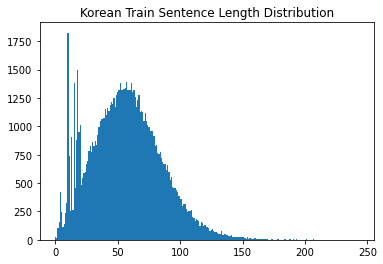

In [21]:
kotrain_sen_length = check_sentence_length( kor_clean_train, "Korean Train")

문장의 최단 길이: 0
문장의 최장 길이: 600
문장의 평균 길이: 123


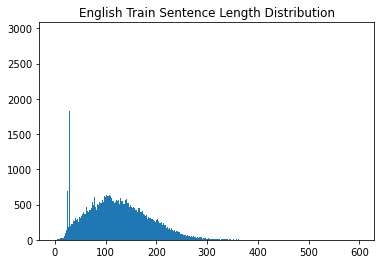

In [22]:
entrain_sen_length = check_sentence_length( eng_clean_train, "English Train")

In [23]:
check_sentence_with_length(kor_clean_train, 1)

[10494] < >
[11724] < >
[11849] < >
[13115] < >
[13759] < >
[13854] < >
[14077] < >
[21057] < >
[21073] < >
[28075] < >
[33709] < >
[37950] < >
[38393] < >
[49537] < >
[49633] < >
[49894] < >
[50155] < >
[50416] < >
[50677] < >
[50938] < >
[51199] < >
[51460] < >


In [24]:
print(eng_clean_train[10494])
print(eng_clean_train[11724])
print(eng_clean_train[11849])

mmr booster

cnn q


In [25]:
check_sentence_with_length(eng_clean_train, 1)

[9491] <5>
[32797] <3>
[32817] <7>


In [26]:
print(kor_clean_train[9491])
print(kor_clean_train[32797])
print(kor_clean_train[32817])

5 어미니의 실수 
3 그곳의 잔디는 생각했던 것보다 그렇게 푸르지 않았다 
7 날씨는 언제나 번명의 수단이 될 수 있다 


In [27]:
check_sentence_with_length(kor_clean_train, 2)

[6262] <1 >
[6267] <2 >
[6271] <3 >
[6274] <4 >
[8293] <면접>
[8933] <음식>
[8939] <햇빛>
[10066] <과일>
[10076] <양파>
[13337] <4 >
[13346] <6 >
[77712] < 투>


In [28]:
print(eng_clean_train[6262])
print(eng_clean_train[6267])
print(eng_clean_train[6271])
print(eng_clean_train[77712])

1 i hated my last boss
2 i don t know anything about the company
3 no i don t have any questions for you
it will come back and you ll make more money than in the bank


In [29]:
check_sentence_with_length(eng_clean_train, 2 )

In [30]:
check_sentence_with_length(kor_clean_train, 3)

[27] <어휘 >
[30] <어휘 >
[282] <어휘 >
[1456] <어휘 >
[2226] <어휘 >
[3003] <어휘 >
[3100] <어휘 >
[3104] <번역 >
[3172] <어휘 >
[3288] <번역 >
[3289] <어휘 >
[3291] <번역 >
[3295] <번역 >
[3329] <어휘 >
[3366] <번역 >
[3374] <어휘 >
[3486] <번역 >
[3557] <어휘 >
[4393] <단장 >
[4519] <인기 >
[4758] <어휘 >
[4833] <번역 >
[5034] <번역 >
[5065] <번역 >
[5155] <사기 >
[5218] <어휘 >
[5220] <번역 >
[5278] <어휘 >
[5346] <어휘 >
[5375] <번역 >
[5494] <어휘 >
[5495] <번역 >
[5514] <어휘 >
[5596] <번역 >
[5742] <어휘 >
[5778] <번역 >
[5782] <어휘 >
[5791] <번역 >
[5800] <번역 >
[9912] < 장소>
[10134] <코브 >
[10147] <코브 >
[21064] <버뮤다>
[22515] < 쇼핑>
[26703] <첫째날>
[26710] <둘째날>
[32795] <교훈 >
[32802] <교훈 >
[64692] <이벤트>
[67263] <프린트>
[70858] <이벤트>
[72748] < 독해>
[73136] < 흡입>
[73677] < 독해>
[73825] < 임명>
[73872] < 주가>
[74049] < 결의>
[74182] < 사전>
[74663] < 시청>
[74910] < 독해>
[75189] < 사전>
[75214] < 우파>
[75973] < 참패>
[75984] < 및 >
[76096] < 독해>
[76171] < 매춘>
[76185] < 위기>
[76756] < 주주>
[77188] < 양보>
[77258] < 사전>
[77726] < 독해>
[78030] < 표준>
[78979] < 독해>
[79596] < 중령>
[79637] <

In [31]:
print(eng_clean_train[27])
print(eng_clean_train[30])
print(eng_clean_train[282])

the geneva based commission in its annual study of the industry titled world robotics 2001 said a record 100 000 robots were installed last year up 25 percent on 1999
postal service whose postmaster told a senate panel that the financial impact of the anthrax crisis could be several billion dollars uses robots to sort parcels but other automated equipment sorts letters
the united states will take every measure against what is perhaps greatest danger of all that may result from hostile states or terrorist groups armed with weapons of mass destruction bush said in a written statement


** kor-eng set으로 null이거나 의미없는 문장은 삭제한다 **

In [32]:
import pandas as pd

df_train = pd.DataFrame({
    'kor': kor_clean_train,
    'eng': eng_clean_train
})
df_train.shape

(94123, 2)

In [33]:
df_train.head

<bound method NDFrame.head of                                                      kor  \
0                   개인용 컴퓨터 사용의 상당 부분은 이것보다 뛰어날 수 있느냐 ?    
1      모든 광마우스와 마찬가지 로 이 광마우스도 책상 위에 놓는 마우스 패드를 필요로 하...   
2                             그러나 이것은 또한 책상도 필요로 하지 않는다    
3      79 95달러하는 이 최첨단 무선 광마우스는 허공에서 팔목 팔 그외에 어떤 부분이든...   
4      정보 관리들은 동남 아시아에서의 선박들에 대한 많은 테러 계획들이 실패로 돌아갔음을...   
...                                                  ...   
94118   우리는 3월 8일 김승연 회장과 그의 아들이 보복폭행에 가담한 혐의를 찾기 위해 ...   
94119   월요일 술집 종업원 6명은 김회장과 아들에게 폭행을 당했음을 진술했다고 경찰은 말했다    
94120                       그러나 불충분한 증거 확보로 수사에 어려움이 있다    
94121                  김회장과 그의 아들은 보복폭행 혐의를 강력히 부인하고 있다    
94122  경찰은 김회장의 집무실에서 추가 증거를 찾은 이후 가능한 한 오늘 김회장과 아들을 ...   

                                                     eng  
0      much of personal computing is about can you to...  
1      so a mention a few weeks ago about a rechargea...  
2      like all optical mice but it also doesn t need...  
3      uses g

In [34]:
import pandas as pd

df_test = pd.DataFrame({
    'kor': kor_clean_test,
    'eng': eng_clean_test
})
df_test.shape

(2000, 2)

**중복제거**

In [35]:
print('kor 열에서 중복을 배제한 유일한 샘플의 수 :', df_train['kor'].nunique())
print('eng 열에서 중복을 배제한 유일한 샘플의 수 :', df_train['eng'].nunique())

kor 열에서 중복을 배제한 유일한 샘플의 수 : 77382
eng 열에서 중복을 배제한 유일한 샘플의 수 : 75550


In [36]:
def drop_garbage_text(df) : 
    

    # 조건 1: 문자열 길이가 0인 경우 제거
    df = df[ (df['kor'].str.len() > 0) & (df['eng'].str.len() > 0) ]

    # 조건 2: 길이가 1이고, 공백인 경우 제거
    df = df[ ~((df['kor'].str.len() == 1) & (df['kor'].str.strip() == '')) ]
    df = df[ ~((df['eng'].str.len() == 1) & (df['eng'].str.strip() == '')) ]

    # 조건 3: 길이가 2이하이고 , 숫자로 시작하는 경우 제거
    df = df[~((df['kor'].str.len() <= 2) & (df['kor'].str.match(r'^\d')))]
    df = df[~((df['eng'].str.len() <= 2) & (df['eng'].str.match(r'^\d')))]
   
    df = df[~df['kor'].str.fullmatch(r'\s?\d\s?')]
    df = df[~df['eng'].str.fullmatch(r'\s?\d\s?')]
    
     
    # 조건 4: 문장이 단일 구두점 (예: "?", "!") 만 있는 경우 제거
    remove_tokens = ['?', '!', '.', ',', '?!', '!?']
    df = df[~df['kor'].str.strip().isin(remove_tokens)]
    df = df[~df['eng'].str.strip().isin(remove_tokens)]
    
    # 조건 5: 'kor' , 'eng' 기준 중복 제거
    df = df.drop_duplicates(subset='kor', keep='first')
    df = df.drop_duplicates(subset='eng', keep='first')
    
    df.reset_index(drop=True)
    
    return df

In [37]:
df_train = drop_garbage_text( df_train )
df_train.shape

(74697, 2)

In [38]:
df_test = drop_garbage_text( df_test )
df_test.shape

(1937, 2)

**Null값 확인**

In [39]:
# 빈 값을 Null 값으로 변환
print(df_train.isnull().sum())

df_train.dropna(axis=0, inplace=True)
print('전체 샘플수 :', (len(df_train)))

kor    0
eng    0
dtype: int64
전체 샘플수 : 74697


In [40]:
print(df_test.isnull().sum())

df_test.dropna(axis=0, inplace=True)
print('전체 샘플수 :', (len(df_test)))

kor    0
eng    0
dtype: int64
전체 샘플수 : 1937


In [41]:
check_sentence_with_length( df_train['kor'], 0)

In [42]:
check_sentence_with_length( df_train['kor'], 1)

In [43]:
check_sentence_with_length( df_train['kor'], 2)

[8248] <면접>
[8885] <음식>
[8891] <햇빛>
[10009] <과일>
[10017] <양파>


In [44]:
check_sentence_with_length( df_train['kor'], 3)

[27] <어휘 >
[3098] <번역 >
[4377] <단장 >
[4503] <인기 >
[5135] <사기 >
[9856] < 장소>
[10073] <코브 >
[20922] <버뮤다>
[22368] < 쇼핑>
[26510] <첫째날>
[26517] <둘째날>
[32573] <교훈 >
[56375] < 독해>
[56721] < 흡입>
[57628] < 사전>
[59213] < 및 >
[59879] < 주주>
[62321] < 중령>
[62670] <통계청>
[69907] <감사원>
[71390] <철도청>


In [45]:
check_sentence_with_length( df_train['eng'], 3)

[8343] <men>


**정제후 길이분포 확인**

한국어의 최소 길이 : 2
한국어의 최대 길이 : 244
한국어의 평균 길이 : 61.91607427339786
영어의 최소 길이   : 3
영어의 최대 길이   : 600
영여의 평균 길이   : 132.3044165093645


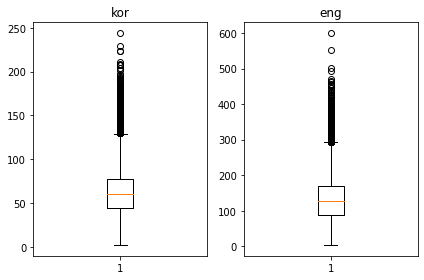

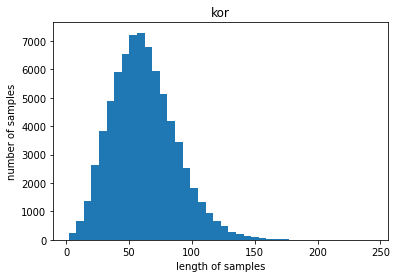

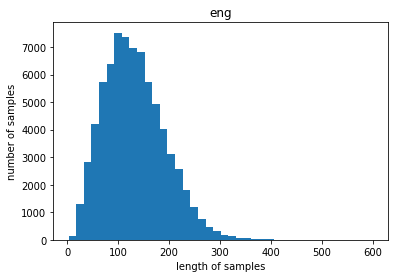

In [46]:
# 길이 분포 출력
import matplotlib.pyplot as plt

kor_len = [len(str) for str in df_train['kor']]
eng_len = [len(str) for str in df_train['eng']]

print('한국어의 최소 길이 : {}'.format(np.min(kor_len)))
print('한국어의 최대 길이 : {}'.format(np.max(kor_len)))
print('한국어의 평균 길이 : {}'.format(np.mean(kor_len)))
print('영어의 최소 길이   : {}'.format(np.min(eng_len)))
print('영어의 최대 길이   : {}'.format(np.max(eng_len)))
print('영여의 평균 길이   : {}'.format(np.mean(eng_len)))

plt.subplot(1,2,1)
plt.boxplot(kor_len)
plt.title('kor')
plt.subplot(1,2,2)
plt.boxplot(eng_len)
plt.title('eng')
plt.tight_layout()
plt.show()

plt.title('kor')
plt.hist(kor_len, bins = 40)
plt.xlabel('length of samples')
plt.ylabel('number of samples')
plt.show()

plt.title('eng')
plt.hist(eng_len, bins = 40)
plt.xlabel('length of samples')
plt.ylabel('number of samples')
plt.show()

In [47]:
kor_max_len = 50
eng_max_len = 100

def below_threshold_len(max_len, nested_list):
    cnt = 0
    for s in nested_list:
        if(len(s) <= max_len):
            cnt = cnt + 1

    ratio = cnt / len(nested_list)
    print("전체 샘플 중 길이가 {} 이하인 샘플의 비율: {:.3f} (총 {}개)".format(max_len, ratio, int(len(nested_list) * ratio)))


below_threshold_len(kor_max_len, df_train['kor'])
below_threshold_len(eng_max_len,  df_train['eng'])


전체 샘플 중 길이가 50 이하인 샘플의 비율: 0.349 (총 26056개)
전체 샘플 중 길이가 100 이하인 샘플의 비율: 0.327 (총 24399개)


### 토큰화

In [48]:
# 한글 토큰화는 KoNLPy의 mecab 클래스
from konlpy.tag import Mecab

mecab = Mecab()

def mecab_split(sentence):  
    return mecab.morphs(sentence)

In [51]:
kor_max_token = 30
eng_max_token = 20

count = 0

for _, row in df_train.iterrows():
    kor = row['kor']
    eng = row['eng']
    
    kor_len = len(mecab.morphs(kor))
    eng_len = len(eng.strip().split())
       
    if kor_len <= kor_max_token and eng_len <= eng_max_token:
        count += 1

print(f"조건을 만족하는 행의 개수: {count}")

조건을 만족하는 행의 개수: 29157


In [52]:
# 모든 데이터를 사용할 경우 학습에 굉장히 오랜 시간이 걸립니다. 
# cleaned_corpus로부터 토큰의 길이가 40 이하인 데이터를 선별하여 eng_corpus와 kor_corpus를 각각 구축하세요.
enc_corpus = []
dec_corpus = []

#kor_max_token = 40
#eng_max_token = 40

for _, row in df_train.iterrows():
    kor = row['kor']
    eng = row['eng']

    if len(kor) <= 2 or len(eng) <= 2:
        continue
    
    kor_len = len(mecab.morphs(kor))
    eng_len = len(eng.strip().split())
    
    if kor_len <= kor_max_token and eng_len <= eng_max_token:
        # 한글은 mecab 토큰화
        enc_corpus.append(mecab_split(kor))
    
        # 영어는 공백 기반 토큰화 + 시작 토근과 종료 토큰 추가
        eng = "<start> " + eng + " <end>"   
        dec_corpus.append( eng.split())

print("enc_corpus 길이:", len(enc_corpus))
print("dec_corpus 길이:", len(dec_corpus))

print("Korean:", enc_corpus[100]) 
print("English:", dec_corpus[100])   


enc_corpus 길이: 29152
dec_corpus 길이: 29152
Korean: ['그리고', '부시', '는', '왜', '이미', '두', '곳', '에서', '대', '규모', '의', '세계', '적', '대치', '상황', '에', '몰두', '해', '있', '는', '때', '에', '그', '문제', '를', '압박', '해', '들어갔', '는가', '?']
English: ['<start>', 'and', 'why', 'had', 'bush', 'pressed', 'the', 'issue', 'when', 'he', 'was', 'already', 'immersed', 'in', 'two', 'major', 'global', 'confrontations', '?', '<end>']


In [53]:

def tokenize(vocab_size, corpus, max_seq_len):
    tokenizer = tf.keras.preprocessing.text.Tokenizer(num_words=vocab_size, filters='')
    tokenizer.fit_on_texts(corpus)

    tensor = tokenizer.texts_to_sequences(corpus)

    tensor = tf.keras.preprocessing.sequence.pad_sequences(tensor, maxlen=max_seq_len, padding='post') 
    # max token으로 짤랐으므로 max_len은 안해도 됨

    return tensor, tokenizer

**Vocab 단어 크기**
- 한국어 : 3만9천
- 영어 : 4만1천 

* 단어장 크기 제한은 없는 걸로??  -> 10000개로 제한해보자

In [54]:
# 토큰화하기
# train_test_split을 활용해서 훈련 데이터와 검증 데이터로 분리하기
# 1. 토큰화

input_tensor, enc_tokenizer = tokenize(10000, enc_corpus, kor_max_token)      # 한글 문장
target_tensor, dec_tokenizer = tokenize(10000, dec_corpus, eng_max_token+2)    # 영어 문장

# 2. 훈련/검증 데이터 분할
input_train, input_val, target_train, target_val = train_test_split(
    input_tensor, target_tensor, test_size=0.2, random_state=42
)

# 3. 확인
print(f"훈련 데이터 개수: {len(input_train)}")
print(f"검증 데이터 개수: {len(input_val)}")

훈련 데이터 개수: 23321
검증 데이터 개수: 5831


In [55]:
print('enc_tokenizer.word_index :', len(enc_tokenizer.word_index))
print('dec_tokenizer.word_index :', len(dec_tokenizer.word_index))
SRC_VOCAB_SIZE = len(enc_tokenizer.index_word) + 1
TGT_VOCAB_SIZE = len(dec_tokenizer.index_word) + 1

enc_tokenizer.word_index : 25889
dec_tokenizer.word_index : 26077


**학습샘플줄이기**

In [56]:
#input_train = input_train[:20000]
#target_train = target_train[:20000]

In [57]:
target_train.shape

(23321, 22)

## Attention 기반 Seq2seq 모델을 설계

- Dropout 모듈을 추가하면 성능이 더 좋아집니다! 
- Embedding Size와 Hidden Size는 실험을 통해 적당한 값을 맞춰 주도록 합니다!

In [58]:
class BahdanauAttention(tf.keras.layers.Layer):
    def __init__(self, units):
        super(BahdanauAttention, self).__init__()
        self.w_dec = tf.keras.layers.Dense(units)
        self.w_enc = tf.keras.layers.Dense(units)
        self.w_com = tf.keras.layers.Dense(1)
    
    def call(self, h_enc, h_dec):
        # h_enc shape: [batch x length x units]
        # h_dec shape: [batch x units]

        h_enc = self.w_enc(h_enc)
        h_dec = tf.expand_dims(h_dec, 1)
        h_dec = self.w_dec(h_dec)

        score = self.w_com(tf.nn.tanh(h_dec + h_enc))
        
        attn = tf.nn.softmax(score, axis=1)

        context_vec = attn * h_enc
        context_vec = tf.reduce_sum(context_vec, axis=1)
        
        # squeeze를 추가해보자
        attn = tf.squeeze(attn, -1)

        return context_vec, attn



In [59]:
class Encoder(tf.keras.Model):
    def __init__(self, vocab_size, embedding_dim, enc_units, dropout):
        super(Encoder, self).__init__()
        self.enc_units = enc_units
        
        # 임베딩 
        self.embedding = tf.keras.layers.Embedding(vocab_size, embedding_dim, mask_zero=True)
       
        # GRU 층
        self.gru = tf.keras.layers.GRU(
            enc_units,
            return_sequences=True,   # 전체 시퀀스 hidden state 반환 (Attention용)
            return_state=True,       # 마지막 hidden state 반환
            recurrent_initializer='glorot_uniform'
        )
        
        self.dropout = tf.keras.layers.Dropout(dropout)
        
    def call(self, x, hidden_state=None):     
        emb = self.embedding(x)  # [batch, seq_len, embedding_dim]

        # 초기 상태가 없다면 0으로 초기화
        if hidden_state is None:
            hidden_state = self.initialize_hidden_state(batch_size=tf.shape(emb)[0])
                    
        enc_output,state = self.gru(emb, initial_state=hidden_state) # state: [batch, enc_units]
        
        enc_output = self.dropout(enc_output)
       
        # 인코더의 모든 time step의 hidden states [batch, seq_len, units]
        return enc_output, state  # ← 단일 텐서만 반환!  
        
    
    def initialize_hidden_state(self, batch_size):
        return [tf.zeros((batch_size, self.enc_units))]

In [60]:
class Decoder(tf.keras.Model):
    def __init__(self, vocab_size, embedding_dim, dec_units, dropout):
        super(Decoder, self).__init__()
        
        self.dec_units = dec_units
        
        # 임베딩 
        self.embedding = tf.keras.layers.Embedding(vocab_size, embedding_dim, mask_zero=True)
        
        # 어텐션
        self.attention = BahdanauAttention( dec_units)   # Attention 필수 사용!
                   
        # GRU 층
        self.gru = tf.keras.layers.GRU(
            dec_units,
            return_sequences=True,   # 전체 시퀀스 hidden state 반환 (Attention용)
            return_state=True,       # 마지막 hidden state 반환
            recurrent_initializer='glorot_uniform'
        )
        
        self.dropout = tf.keras.layers.Dropout(dropout)
        
        self.fc = tf.keras.layers.Dense(vocab_size)  # 출력 단어 예측용

    def call(self, x, h_dec, enc_out):      
        # 1. 디코더 입력 임베딩
        x = self.embedding(x)  # [batch, 1, embedding_dim]
        
        # 2. Attention 계산 (self, h_enc, h_dec):
        context_vector, attention_weights = self.attention(enc_out, h_dec)  # context: [batch, enc_units]

        # 3. context_vector와 임베딩 결합
        x = tf.concat([tf.expand_dims(context_vector, 1), x], axis=-1)  # [batch, 1, embedding_dim + enc_units]

        # 4. GRU 통과
        #output, state = self.gru(x)  # output: [batch, 1, dec_units]
        output, state = self.gru(x, initial_state=h_dec)

        # 5. Dropout
        output = self.dropout(output)
        
        # 6. 출력 단어 예측
        output = tf.reshape(output, (-1, output.shape[2]))  # [batch, dec_units]
        x = self.fc(output)  # [batch, vocab_size]
        
        return x, state, attention_weights

In [61]:
optimizer = tf.keras.optimizers.Adam()
loss_object = tf.keras.losses.SparseCategoricalCrossentropy(
    from_logits=True, reduction='none')
    # from_logits=True: y_pred가 softmax 되기 전 값 (logits : softmax를 거치기 직전값)이기 때문
    # → 손실 함수 내부에서 softmax를 자동으로 처리
    # reduction='none': 손실을 일괄 평균하지 않고, 토큰마다 개별 손실 계산
    # → 나중에 마스크를 씌워서 패딩 위치 손실은 제거할 수 있게 함

def loss_function(real, pred):
    mask = tf.math.logical_not(tf.math.equal(real, 0)) # 패딩(0) 위치는 False
    loss = loss_object(real, pred)
    
    mask = tf.cast(mask, dtype=loss.dtype)             # Boolean mask → float32
    loss *= mask                                       # 패딩 위치는 손실 0으로 만듦
    
    return tf.reduce_mean(loss)

In [62]:
# 모델 정의

BATCH_SIZE    = 32
units         = 512  #attention dense unit
embedding_dim = 512
dropout       = 0.3

encoder = Encoder(SRC_VOCAB_SIZE, embedding_dim, units, dropout)
decoder = Decoder(TGT_VOCAB_SIZE, embedding_dim, units, dropout)


**훈련 Step**

In [63]:
@tf.function
def train_step(src, tgt, encoder, decoder, optimizer, dec_tok):
    batch_size = src.shape[0]
    loss = 0

    with tf.GradientTape() as tape:
        enc_out, enc_state = encoder(src)
        #h_dec = enc_out[:, -1]   # 마지막 time step의 hidden state를 디코더 초기값으로 사용
        h_dec = enc_state
        
        # 디코더 입력 초기값: <start> 토큰
        dec_src = tf.expand_dims([dec_tok.word_index['<start>']] * batch_size, 1)

        for t in range(1, tgt.shape[1]):
            pred, h_dec, _ = decoder(dec_src, h_dec, enc_out)

            # 손실 누적 (teacher forcing)
            loss += loss_function(tgt[:, t], pred)
            # 다음 디코더 입력은 정답 (teacher forcing)
            dec_src = tf.expand_dims(tgt[:, t], 1)
        
    batch_loss = (loss / int(tgt.shape[1]))

    # 역전파 및 최적화
    variables = encoder.trainable_variables + decoder.trainable_variables
    gradients = tape.gradient(loss, variables)
    optimizer.apply_gradients(zip(gradients, variables))
    
    return batch_loss

**검증 Step**

In [64]:
@tf.function
def eval_step(src, tgt, encoder, decoder, dec_tok):
    batch_size = src.shape[0]
    loss = 0

    enc_out, enc_state = encoder(src)
    #h_dec = enc_out[:, -1]   # 마지막 time step의 hidden state를 디코더 초기값으로 사용
    h_dec = enc_state
        
    # 디코더 입력 초기값: <start> 토큰
    dec_src = tf.expand_dims([dec_tok.word_index['<start>']] * batch_size, 1)

    for t in range(1, tgt.shape[1]):
        pred, h_dec, _ = decoder(dec_src, h_dec, enc_out)

        # 손실 누적 (teacher forcing)
        loss += loss_function(tgt[:, t], pred)
        # 다음 디코더 입력은 정답 (teacher forcing)
        dec_src = tf.expand_dims(tgt[:, t], 1)
        
    batch_loss = (loss / int(tgt.shape[1]))
  
    return batch_loss



In [65]:
from tqdm import tqdm    # tqdm은 훈련의 진행 과정을 한눈에 볼 수 있게 해주는 라이브러리
import random


EPOCHS = 10

all_train_loss = []

for epoch in range(EPOCHS):
    
    # train set
    train_loss = 0
    num_batches = 0
    
    idx_list = list(range(0, input_train.shape[0], BATCH_SIZE))
    random.shuffle(idx_list)
    t = tqdm(idx_list)    # tqdm

    for (batch, idx) in enumerate(t):
        batch_loss = train_step(input_train[idx:idx+BATCH_SIZE],
                                target_train[idx:idx+BATCH_SIZE],
                                encoder,
                                decoder,
                                optimizer,
                                dec_tokenizer)
    
        train_loss += batch_loss
        num_batches += 1
  
            
        t.set_description_str('Train Epoch %2d' % (epoch + 1))    # tqdm
        t.set_postfix_str('Loss %.4f' % (train_loss.numpy() / (batch + 1)))    # tqdm
    
    
    
    # validation set
    val_loss = 0
    val_batches = 0
    
    idx_list = list(range(0, input_val.shape[0], BATCH_SIZE))
    random.shuffle(idx_list)
    t = tqdm(idx_list)

    for (test_batch, idx) in enumerate(t):
        test_batch_loss = eval_step(input_val[idx:idx+BATCH_SIZE],
                                    target_val[idx:idx+BATCH_SIZE],
                                    encoder,
                                    decoder,
                                    dec_tokenizer)
    
        val_loss += test_batch_loss
        val_batches += 1

        t.set_description_str('Val   Epoch %2d' % (epoch + 1))
        t.set_postfix_str('Val Loss %.4f' % (val_loss.numpy() / (test_batch + 1)))
    
    

    all_train_loss.append ( {
        'epochs' : epoch+1,
        'loss' : train_loss.numpy()/num_batches,
         'val_loss' : val_loss.numpy()/val_batches 
        })
    
    print(f"Epoch: {epoch+1} loss={train_loss / num_batches:.4f} val_loss={val_loss / val_batches:.4f}")

Val   Epoch  1: 100%|██████████| 183/183 [00:18<00:00,  9.86it/s, Val Loss 3.8658]


Epoch: 1 loss=4.3297 val_loss=3.8658


Val   Epoch  2: 100%|██████████| 183/183 [00:05<00:00, 32.96it/s, Val Loss 3.5069]


Epoch: 2 loss=3.6161 val_loss=3.5069


Val   Epoch  3: 100%|██████████| 183/183 [00:05<00:00, 32.80it/s, Val Loss 3.3521]


Epoch: 3 loss=3.1992 val_loss=3.3521


Val   Epoch  4: 100%|██████████| 183/183 [00:05<00:00, 32.72it/s, Val Loss 3.3147]


Epoch: 4 loss=2.8285 val_loss=3.3147


Val   Epoch  5: 100%|██████████| 183/183 [00:05<00:00, 32.78it/s, Val Loss 3.3386]


Epoch: 5 loss=2.4690 val_loss=3.3386


Val   Epoch  6: 100%|██████████| 183/183 [00:05<00:00, 32.78it/s, Val Loss 3.4018]


Epoch: 6 loss=2.1191 val_loss=3.4018


Val   Epoch  7: 100%|██████████| 183/183 [00:05<00:00, 32.74it/s, Val Loss 3.4874]


Epoch: 7 loss=1.7985 val_loss=3.4874


Val   Epoch  8: 100%|██████████| 183/183 [00:05<00:00, 32.81it/s, Val Loss 3.5907]


Epoch: 8 loss=1.5203 val_loss=3.5907


Val   Epoch  9: 100%|██████████| 183/183 [00:05<00:00, 32.80it/s, Val Loss 3.7052]


Epoch: 9 loss=1.2805 val_loss=3.7052


Val   Epoch 10: 100%|██████████| 183/183 [00:05<00:00, 32.90it/s, Val Loss 3.8379]

Epoch: 10 loss=1.0724 val_loss=3.8379


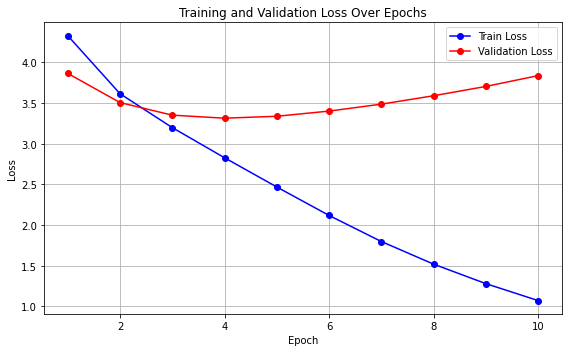

In [66]:
import matplotlib.pyplot as plt

# 에폭과 손실 리스트 분리
epochs = [entry['epochs'] for entry in all_train_loss]
losses = [entry['loss'] for entry in all_train_loss]
val_losses = [entry['val_loss'] for entry in all_train_loss]

# 시각화
plt.figure(figsize=(8, 5))
plt.plot(epochs, losses, marker='o', color='blue', label='Train Loss')
plt.plot(epochs, val_losses, marker='o', color='red', label='Validation Loss')
plt.title('Training and Validation Loss Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

## Test

**Test 데이타**

In [67]:
# 1. 토큰화

enc_sequences = []
dec_sequences = []



max_kor_len = 0
max_eng_len = 0

for _, row in df_test.iterrows():
    kor = row['kor']
    eng = row['eng']
  
    kor_len = len(mecab.morphs(kor))
    if max_kor_len < kor_len : 
        max_kor_len = kor_len
        
    eng_len = len(eng.strip().split())
    if max_eng_len < eng_len : 
        max_eng_len = eng_len
    
    # 한글은 mecab 토큰화
    enc_sequences.append(mecab.morphs(kor))
    
    # 영어는 공백 기반 토큰화 + 시작 토근과 종료 토큰 추가
    eng = "<start> " + eng + " <end>"   
    dec_sequences.append( eng.split())
    
print("enc_max_token 길이:", max_kor_len)
print("dec_max_token 길이:", max_eng_len)
    
print("enc_sequences 길이:", len(enc_sequences))
print("dec_sequences 길이:", len(dec_sequences))

print("Korean:", enc_sequences[100]) 
print("English:", dec_sequences[100])   

# 2. 토큰 벡터
#input_test, enc_test_tokenizer = tokenize(enc_sequences, max_kor_len)      # 한글 문장
#target_test, dec_test_tokenizer = tokenize(dec_sequences, max_eng_len+2)    # 영어 문장

#SRC_TEST_VOCAB_SIZE = len(enc_test_tokenizer.index_word) + 1
#TGT_TEST_VOCAB_SIZE = len(dec_test_tokenizer.index_word) + 1

#print('SRC_TEST_VOCAB_SIZE :', SRC_TEST_VOCAB_SIZE)
#print('TGT_TEST_VOCAB_SIZE :', TGT_TEST_VOCAB_SIZE)

# 3. 
#encoder_t = Encoder(SRC_TEST_VOCAB_SIZE, embedding_dim, units, dropout)
#decoder_t = Decoder(TGT_TEST_VOCAB_SIZE, embedding_dim, units, dropout)

input_test = enc_tokenizer.texts_to_sequences(enc_sequences)
input_test = tf.keras.preprocessing.sequence.pad_sequences(input_test, maxlen=max_kor_len, padding='post')
target_test = dec_tokenizer.texts_to_sequences(dec_sequences)
target_test = tf.keras.preprocessing.sequence.pad_sequences(target_test, maxlen=max_eng_len, padding='post')

enc_max_token 길이: 98
dec_max_token 길이: 70
enc_sequences 길이: 1937
dec_sequences 길이: 1937
Korean: ['인도네시아', '역사', '상', '최악', '의', '테러', '행위', '로', '묘사', '된', '강력', '한', '차량', '폭탄', '이', '발리', '의', '한', '나이트', '클럽', '을', '산산조각', '낸', '폭발', '의', '원인', '으로', '여겨', '지', '고', '있', '는데', '이', '폭발', '로', '200', '명', '가까운', '사람', '들', '이', '사망', '했으며', '그', '들', '대부분', '은', '호주인', '관광객', '들', '로', '여겨', '지', '고', '있', '다']
English: ['<start>', 'described', 'as', 'the', 'worst', 'act', 'of', 'terrorism', 'in', 'indonesia', 's', 'history', 'a', 'massive', 'car', 'bomb', 'is', 'believed', 'responsible', 'for', 'a', 'blast', 'that', 'tore', 'through', 'a', 'nightclub', 'in', 'bali', 'killing', 'nearly', '200', 'people', 'most', 'of', 'them', 'thought', 'to', 'be', 'australian', 'tourists', '<end>']


In [68]:
def test_step(src, tgt, encoder, decoder, dec_tok):
    batch_size = src.shape[0]
    loss = 0

    enc_out, enc_state = encoder(src)
    #h_dec = enc_out[:, -1]   # 마지막 time step의 hidden state를 디코더 초기값으로 사용
    h_dec = enc_state
        
    # 디코더 입력 초기값: <start> 토큰
    dec_src = tf.expand_dims([dec_tok.word_index['<start>']] * batch_size, 1)

    for t in range(1, tgt.shape[1]):
        pred, h_dec, _ = decoder(dec_src, h_dec, enc_out)

        #predicted_id = tf.argmax(tf.math.softmax(pred, axis=-1)[0]).numpy()
        predicted_id = tf.argmax(pred, axis=-1)  # shape: (batch_size,)
        
        # 손실 누적 (teacher forcing)
        loss += loss_function(tgt[:, t], pred)
        
        dec_src = tf.expand_dims(predicted_id, 1)  # 이전 예측을 다음 입력으로
        
    batch_loss = (loss / int(tgt.shape[1]))
  
    return batch_loss

In [69]:
EPOCHS = 1

all_test_loss = []

for epoch in range(EPOCHS):
    # test set
    test_loss = 0
    test_batches = 0
    
    idx_list = list(range(0, input_test.shape[0], BATCH_SIZE))
    random.shuffle(idx_list)
    t = tqdm(idx_list)

    for (test_batch, idx) in enumerate(t):
        test_batch_loss = test_step(input_test[idx:idx+BATCH_SIZE],
                                    target_test[idx:idx+BATCH_SIZE],
                                    encoder,
                                    decoder,
                                    dec_tokenizer)
    
        test_loss += test_batch_loss
        test_batches += 1

        t.set_description_str('Test Epoch %2d' % (epoch + 1))
        t.set_postfix_str('Test Loss %.4f' % (test_loss.numpy() / (test_batch + 1)))
    
    

    all_test_loss.append ( {
        'epochs' : epoch+1,
         'loss' : test_loss.numpy()/test_batches 
        })
    
    print(f"Epoch: {epoch+1}  loss={test_loss / test_batches:.4f}")

Test Epoch  1: 100%|██████████| 61/61 [00:40<00:00,  1.50it/s, Test Loss 3.4806]

Epoch: 1  loss=3.4806


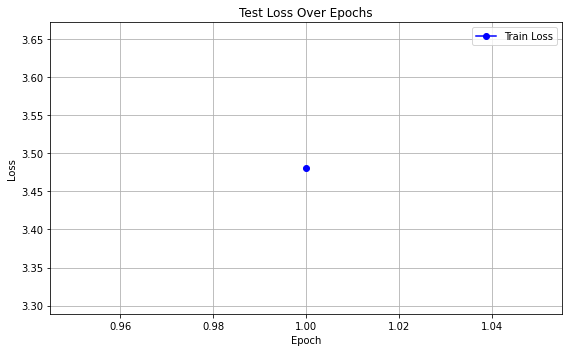

In [70]:
import matplotlib.pyplot as plt

# 에폭과 손실 리스트 분리
epochs = [entry['epochs'] for entry in all_test_loss]
losses = [entry['loss'] for entry in all_test_loss]


# 시각화
plt.figure(figsize=(8, 5))
plt.plot(epochs, losses, marker='o', color='blue', label='Train Loss')
plt.title('Test Loss Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

## 추론

In [71]:
import matplotlib.font_manager as fm

def evaluate(sentence, encoder, decoder, enc_train, dec_train):
    
    attention = np.zeros((dec_train.shape[-1], enc_train.shape[-1]))
    
    sentence = preprocess_kor_sentence(sentence)
    tokens = mecab.morphs(sentence) 
    print(tokens)
    inputs = enc_tokenizer.texts_to_sequences([tokens])
    inputs = tf.keras.preprocessing.sequence.pad_sequences(inputs,
                                                           maxlen=enc_train.shape[-1],
                                                           padding='post')

    result = ''

    enc_out, enc_state = encoder(inputs)

    #dec_hidden = enc_out[:, -1] # 마지막 encoder hidden state 
    dec_hidden = enc_state
    
    dec_input = tf.expand_dims([dec_tokenizer.word_index['<start>']], 0)

    for t in range(dec_train.shape[-1]):
        predictions, dec_hidden, attention_weights = decoder(dec_input,
                                                             dec_hidden,
                                                             enc_out)

        attention_weights = tf.reshape(attention_weights, (-1, ))
        attention[t] = attention_weights.numpy()

        predicted_id = tf.argmax(tf.math.softmax(predictions, axis=-1)[0]).numpy()

        predicted_word = dec_tokenizer.index_word.get(predicted_id, '<unk>')  # 안전하게 접근
        result += predicted_word + ' '
                
        if predicted_word == '<end>':
            return result, sentence, attention      
        
        dec_input = tf.expand_dims([predicted_id], 0)

    return result, tokens, attention


def plot_attention(attention, sentence, predicted_sentence):
    fig = plt.figure(figsize=(10,10))
    ax = fig.add_subplot(1, 1, 1)
    ax.matshow(attention, cmap='viridis')

    fontdict = {'fontsize': 14}

    ax.set_xticklabels([''] + list(sentence), fontdict=fontdict, rotation=90)
    ax.set_yticklabels([''] + predicted_sentence, fontdict=fontdict)

    ax.xaxis.set_major_locator(ticker.MultipleLocator(1))
    ax.yaxis.set_major_locator(ticker.MultipleLocator(1))
    
    #fm._rebuild()
    plt.rc('font', family='NanumGothic')
    plt.rcParams['axes.unicode_minus'] = False

    plt.show()

    
def translate(sentence, encoder, decoder, dispaly_map=False):
    result = ''
    result, tokens, attention = evaluate(sentence, encoder, decoder, input_train, target_train)

    print('Input: %s' % (sentence))
    print('Predicted translation: {}'.format(result))
    
    if dispaly_map == True :
        attention = attention[:len(result.strip().split()), :len(tokens)]
        plot_attention(attention, sentence, result.split(' '))

In [72]:
result1, _, attn1 = evaluate("오바마는 대통령이다", encoder, decoder, input_train, target_train)
result2, _, attn2 = evaluate("오바마는 대통령이었지만 지금은 아니다", encoder, decoder, input_train, target_train)

np.allclose(attn1, attn2)  # True일 경우: 동일한 attention

['오바마', '는', '대통령', '이', '다']
['오바마', '는', '대통령', '이', '었', '지만', '지금', '은', '아니', '다']


False

In [73]:
translate("번역된 문장이 동일하게 출력되는데 원인이 뭘까?", encoder, decoder)

['번역', '된', '문장', '이', '동일', '하', '게', '출력', '되', '는', '데', '원인', '이', '뭘까', '?']
Input: 번역된 문장이 동일하게 출력되는데 원인이 뭘까?
Predicted translation: the u s is not known for this hits ? <end> 


In [74]:
translate("커피는 필요 없다.", encoder, decoder)

['커피', '는', '필요', '없', '다']
Input: 커피는 필요 없다.
Predicted translation: the isn t a few weeks ago <end> 


['오바마', '는', '대통령', '이', '다']
Input: 오바마는 대통령이다.
Predicted translation: obama s replacement is in the final <end> 


/tmp/ipykernel_148/127304398.py:52: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([''] + list(sentence), fontdict=fontdict, rotation=90)
/tmp/ipykernel_148/127304398.py:53: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([''] + predicted_sentence, fontdict=fontdict)
/opt/conda/lib/python3.9/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 50724 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/opt/conda/lib/python3.9/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 48148 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/opt/conda/lib/python3.9/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 47560 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/opt/conda/lib/python3.9/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 45716 missing from cu

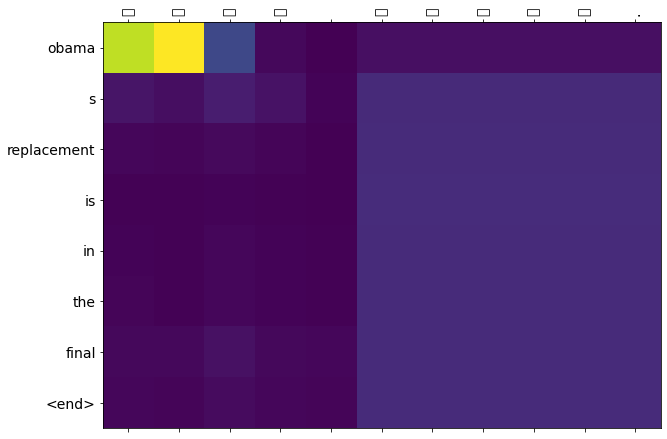

In [75]:
translate("오바마는 대통령이다.", encoder, decoder, True)

In [76]:
translate("시민들은 도시 속에 산다.", encoder, decoder)

['시민', '들', '은', '도시', '속', '에', '산다']
Input: 시민들은 도시 속에 산다.
Predicted translation: the ships are free <end> 


In [77]:
translate("일곱 명의 사망자가 발생했다.", encoder, decoder)

['일곱', '명', '의', '사망자', '가', '발생', '했', '다']
Input: 일곱 명의 사망자가 발생했다.
Predicted translation: five civilians were killed <end> 


['어제', '트랜스포머', '라는', '차', '가', '변환', '되', '는', '액션', '영화', '를', '봤', '다']
Input: 어제 트랜스포머라는 차가 변환되는 액션 영화를 봤다
Predicted translation: the credentials on the street was a good for the time of a year <end> 


/tmp/ipykernel_148/127304398.py:52: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([''] + list(sentence), fontdict=fontdict, rotation=90)
/tmp/ipykernel_148/127304398.py:53: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([''] + predicted_sentence, fontdict=fontdict)


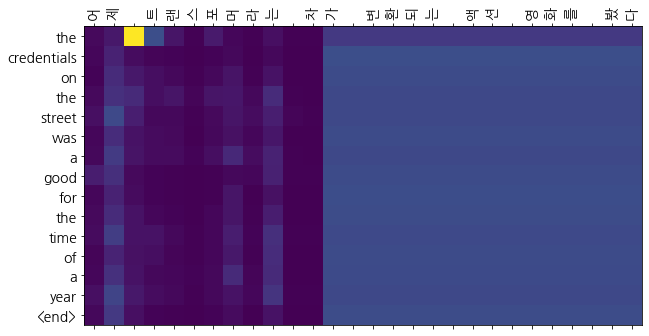

In [78]:
# 외래어
translate("어제 트랜스포머라는 차가 변환되는 액션 영화를 봤다", encoder, decoder, True)

In [79]:
# 다의어
translate("인도에 주차된 차는 주차 위반이다.", encoder, decoder)

['인도', '에', '주차', '된', '차', '는', '주차', '위반', '이', '다']
Input: 인도에 주차된 차는 주차 위반이다.
Predicted translation: india s whale from the water area is a rare <end> 


In [80]:
# 길이가 짧은 문장
translate("나는", encoder, decoder)

['나', '는']
Input: 나는
Predicted translation: i m going to be happy <end> 


['내일', '온라인', '과정', '이', '종', '룧', '된다는', '안내', '메일', '을', '받', '았', '다']
Input: 내일 온라인 과정이 종룧 된다는 안내 메일을 받았다
Predicted translation: ironically has given a huge mistake that could help them a lot of movies <end> 


/tmp/ipykernel_148/127304398.py:52: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([''] + list(sentence), fontdict=fontdict, rotation=90)
/tmp/ipykernel_148/127304398.py:53: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([''] + predicted_sentence, fontdict=fontdict)


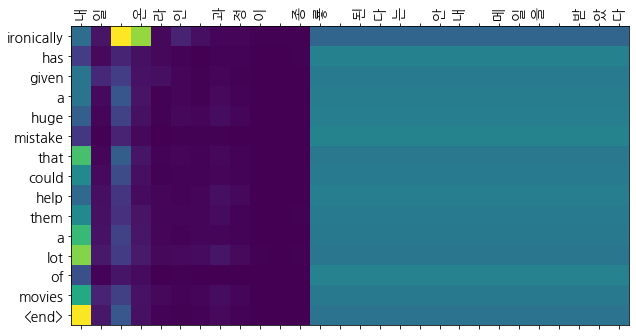

In [81]:
# 오타
translate("내일 온라인 과정이 종룧 된다는 안내 메일을 받았다", encoder, decoder, True)

In [82]:
# 학습에 있는 문장
translate("막대한 비용이 드는 이 사업에 대해 내년에 건설을 시작할 계획이다", encoder, decoder)

['막대', '한', '비용', '이', '드', '는', '이', '사업', '에', '대해', '내년', '에', '건설', '을', '시작', '할', '계획', '이', '다']
Input: 막대한 비용이 드는 이 사업에 대해 내년에 건설을 시작할 계획이다
Predicted translation: the plant will be the largest to the plant s origin and usually into orbit <end> 


# 회고

**정량평가**
< 하이퍼파라미터 > 
1. dropout이 없는 경우 

BATCH_SIZE    = 32
units         = 512  #attention dense unit
embedding_dim = 512
dropout       = 0.3

- ![no_dropdout](./no_dropout.png)


2. train data를 2만개로 줄였을 때 
- train시 loss가 안정적으로 줄어들며, 예측문장도 49000개일 때 보다는 좀더 나아보인다. 

- ![train_2000](./train_20000.png)

**정성평가**
1. The 만 출력하거나, end만 출력하는 예측을 하지 못함

**오류**
1. 최현영님이 지적해주신 Decoder의 GRU layer에 hidden state값 누락 부분을 추가
   ->  2~3 epoch후 loss가 줄어들지 않는 문제 해결한듯 보였으나, 과적합 현상이 나타남
   
2. Decoder의 예측 결과가 동일한 단어를 반복하며 무한 루프에 빠지는 현상   
   - <end> 토큰이 학습 중 잘 반영되지 않았거나, 
   - 디코더가 한 단어("the"나 "president")를 지나치게 높은 확신으로 반복 예측함.
   
   - --> 훈련데이타 개수를 20000개로 줄였던 것을 전체 훈련 데이타로 복원하고 시험하였을 때, 여전함 
3. 훈련 시간이 많이 걸려서, 훈련 데이터 개수 49728를 20000개로 줄여서 시험하여서, 훈련 정확도가 떨어지는 문제가 있음 
    
    -> 훈련 데이타를 전부 사용하여 훈련을 하고, ephoch수를 늘려서 시험해도, 동일 단어를 반복 출력함

4. VOCAB size를 10000으로 줄여서 시험해도 동일함

**추가 시험할 것**


1. 훈련 시간이 많이 걸려서, 훈련 데이터 개수 49728를 20000개로 줄여서 시험하여서, 훈련 정확도가 떨어지는 문제가 잇음 
   ->  훈련 데이타를 전부 사용하여 훈련을 하고, ephoch수를 늘려서 시험할 필요 있음 

2. VOCAB Size를 훈련데이타의 단어 사이즈를 사용하였은데, VOCAB size를 10000~15000 정도로 줄여서 시험해볼 필요 있음 